<a href="https://colab.research.google.com/github/Arju-Jawla/Wind_Speed/blob/main/WIND_FIELD_03_CORRELATION_ON_MAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Install Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Loading the data

In [ ]:
file_path = '/content/drive/MyDrive/Project Learnings/Data/WIND FIELD RELATED 1923/ERA5_merged_6hrly_daily_2019-23.nc'

In [ ]:
df = xr.open_dataset(file_path)

In [ ]:
df

<xarray.Dataset> Size: 3GB
Dimensions:         (valid_time: 7304, latitude: 121, longitude: 81)
Coordinates:
    expver          (valid_time) object 58kB ...
  * valid_time      (valid_time) datetime64[ns] 58kB 2019-01-01 ... 2023-12-3...
  * latitude        (latitude) float64 968B 30.0 29.75 29.5 ... 0.5 0.25 0.0
  * longitude       (longitude) float64 648B 80.0 80.25 80.5 ... 99.75 100.0
    number          int32 4B ...
Data variables:
    u10             (valid_time, latitude, longitude) float32 286MB ...
    v10             (valid_time, latitude, longitude) float32 286MB ...
    blh             (valid_time, latitude, longitude) float32 286MB ...
    cape            (valid_time, latitude, longitude) float32 286MB ...
    d2m             (valid_time, latitude, longitude) float32 286MB ...
    fsr             (valid_time, latitude, longitude) float32 286MB ...
    geo             (valid_time, latitude, longitude) float32 286MB ...
    msl             (valid_time, latitude, longitude) float32 286MB ...
    t2m             (valid_time, latitude, longitude) float32 286MB ...
    wind_magnitude  (valid_time, latitude, longitude) float32 286MB ...
    RH              (valid_time, latitude, longitude) float32 286MB ...
    spg             (valid_time, latitude, longitude) float32 286MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-12T10:19 GRIB to CDM+CF via cfgrib-0.9.1...

## 2.1 subsetting maximum values only

In [ ]:
# Step 1: Take the max values for each variable across the time dimension
max_values = df.max(dim='valid_time')

In [ ]:
# Step 2: Convert the data to a pandas DataFrame
df_max = max_values.to_dataframe()

In [ ]:
# Drop the 'number' variable (since it contains NaN and isn't useful)
df_max = df_max.drop(columns=['number', 'u10', 'v10', 'd2m'])

## 3. Finding Correlation Matrix

In [ ]:
# Step 3: Compute the correlation matrix
correlation_matrix = df_max.corr()

In [ ]:
print(correlation_matrix)

                     blh      cape       fsr       geo       msl       t2m  \
blh             1.000000  0.053804  0.477523  0.487418  0.695515  0.344401   
cape            0.053804  1.000000  0.086649 -0.225098 -0.004490  0.323435   
fsr             0.477523  0.086649  1.000000  0.169952  0.260411  0.392293   
geo             0.487418 -0.225098  0.169952  1.000000  0.886141 -0.590319   
msl             0.695515 -0.004490  0.260411  0.886141  1.000000 -0.268949   
t2m             0.344401  0.323435  0.392293 -0.590319 -0.268949  1.000000   
wind_magnitude -0.510458  0.312879 -0.665892 -0.470813 -0.466036 -0.138614   
RH              0.772209  0.241447  0.700502  0.460750  0.661003  0.355521   
spg             0.269481  0.292013  0.009362  0.612659  0.625818 -0.428245   

                wind_magnitude        RH       spg  
blh                  -0.510458  0.772209  0.269481  
cape                  0.312879  0.241447  0.292013  
fsr                  -0.665892  0.700502  0.009362  
geo    

In [ ]:
# Step 4: Extract the correlation of wind_magnitude with all other variables
correlation_wind = correlation_matrix['wind_magnitude'].drop('wind_magnitude')  # Drop wind_magnitude itself
print(correlation_wind)

blh    -0.510458
cape    0.312879
fsr    -0.665892
geo    -0.470813
msl    -0.466036
t2m    -0.138614
RH     -0.666125
spg     0.142276
Name: wind_magnitude, dtype: float64


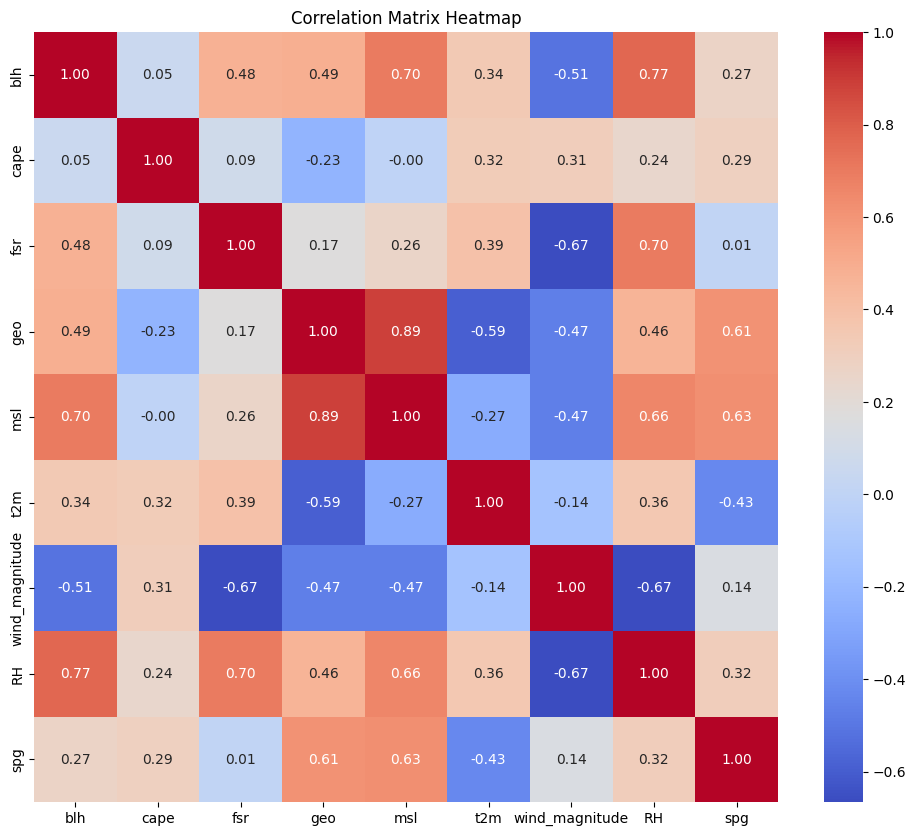

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.savefig('/content/drive/MyDrive/Project Learnings/Data/WIND FIELD RELATED 1923/max_pearson_correlation_heatmap.png')
plt.show()

In [ ]:
# Compute Spearman correlation
spearman_corr = df_max.corr(method='spearman')

In [ ]:
# Display the correlation matrices
print("\nSpearman Correlation:\n", spearman_corr)


Spearman Correlation:
                      blh      cape       fsr       geo       msl       t2m  \
blh             1.000000  0.297505  0.797998  0.697424  0.839764  0.530812   
cape            0.297505  1.000000  0.406932  0.032061  0.385313  0.598252   
fsr             0.797998  0.406932  1.000000  0.732049  0.772462  0.587745   
geo             0.697424  0.032061  0.732049  1.000000  0.725491  0.245809   
msl             0.839764  0.385313  0.772462  0.725491  1.000000  0.403747   
t2m             0.530812  0.598252  0.587745  0.245809  0.403747  1.000000   
wind_magnitude -0.494767  0.169559 -0.612981 -0.781334 -0.495733 -0.178101   
RH              0.782074  0.342265  0.870328  0.781451  0.838837  0.458667   
spg             0.562210  0.499155  0.578379  0.399643  0.719987  0.177195   

                wind_magnitude        RH       spg  
blh                  -0.494767  0.782074  0.562210  
cape                  0.169559  0.342265  0.499155  
fsr                  -0.612981  0.87

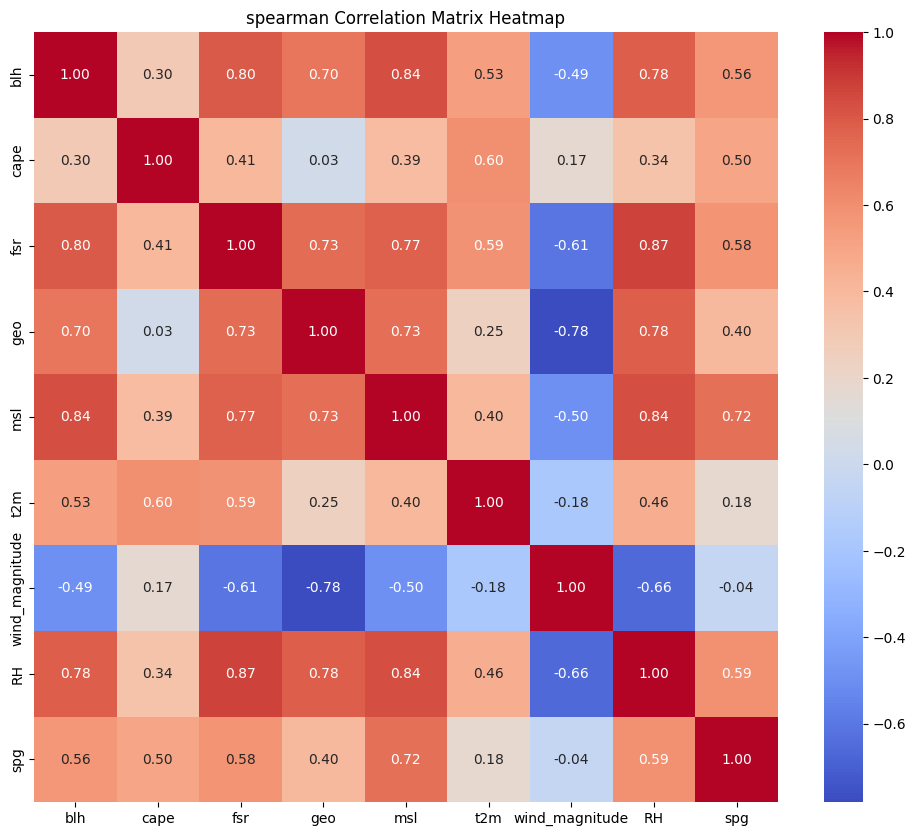

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("spearman Correlation Matrix Heatmap")
plt.savefig('/content/drive/MyDrive/Project Learnings/Data/WIND FIELD RELATED 1923/max_spearman_correlation_heatmap.png')
plt.show()

In [ ]:
spearman_correlation_wind = spearman_corr['wind_magnitude'].drop('wind_magnitude')  # Drop wind_magnitude itself
print(spearman_correlation_wind)

blh    -0.494767
cape    0.169559
fsr    -0.612981
geo    -0.781334
msl    -0.495733
t2m    -0.178101
RH     -0.660082
spg    -0.042189
Name: wind_magnitude, dtype: float64


In [ ]:
# Compute Kendall correlation
kendall_corr = df_max.corr(method='kendall')

In [ ]:
# Display the correlation matrices
print("\nKendall Correlation:\n", kendall_corr)


Kendall Correlation:
                      blh      cape       fsr       geo       msl       t2m  \
blh             1.000000  0.186052  0.590868  0.472810  0.632187  0.420607   
cape            0.186052  1.000000  0.261569  0.007719  0.286319  0.414844   
fsr             0.590868  0.261569  1.000000  0.498996  0.560899  0.415751   
geo             0.472810  0.007719  0.498996  1.000000  0.532691  0.177654   
msl             0.632187  0.286319  0.560899  0.532691  1.000000  0.380064   
t2m             0.420607  0.414844  0.415751  0.177654  0.380064  1.000000   
wind_magnitude -0.226453  0.111731 -0.341794 -0.576498 -0.273538 -0.064301   
RH              0.549597  0.225347  0.666344  0.564631  0.643095  0.371259   
spg             0.363546  0.366113  0.391507  0.303286  0.513093  0.112318   

                wind_magnitude        RH       spg  
blh                  -0.226453  0.549597  0.363546  
cape                  0.111731  0.225347  0.366113  
fsr                  -0.341794  0.666

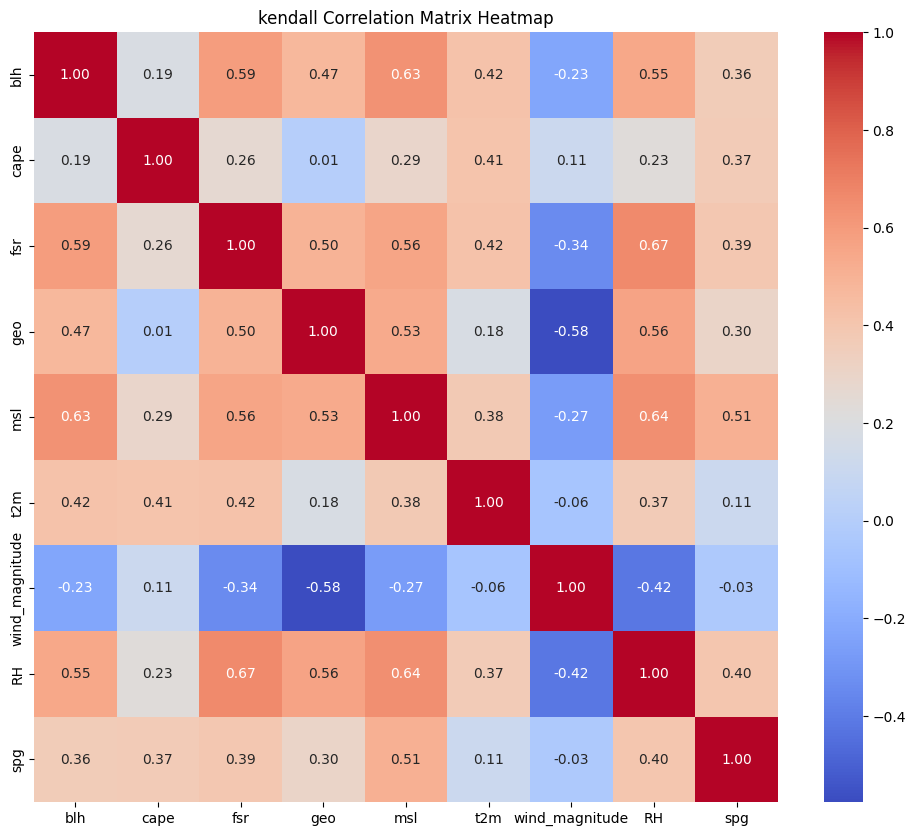

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("kendall Correlation Matrix Heatmap")
plt.savefig('/content/drive/MyDrive/Project Learnings/Data/WIND FIELD RELATED 1923/max_kendall_correlation_heatmap.png')
plt.show()

In [ ]:
kendall_correlation_wind = kendall_corr['wind_magnitude'].drop('wind_magnitude')  # Drop wind_magnitude itself
print(kendall_correlation_wind)

blh    -0.226453
cape    0.111731
fsr    -0.341794
geo    -0.576498
msl    -0.273538
t2m    -0.064301
RH     -0.420009
spg    -0.034567
Name: wind_magnitude, dtype: float64


In [ ]:
# Combine correlation values into a dictionary
data = {
    'Pearson': correlation_wind,
    'Spearman': spearman_correlation_wind,
    'Kendall': kendall_correlation_wind
}

# Create a Pandas DataFrame
correlation_df = pd.DataFrame(data)

In [ ]:
correlation_df

,Pearson,Spearman,Kendall
blh,-0.510458,-0.494767,-0.226453
cape,0.312879,0.169559,0.111731
fsr,-0.665892,-0.612981,-0.341794
geo,-0.470813,-0.781334,-0.576498
msl,-0.466036,-0.495733,-0.273538
t2m,-0.138614,-0.178101,-0.064301
RH,-0.666125,-0.660082,-0.420009
spg,0.142276,-0.042189,-0.034567


In [ ]:
# Save the correlation table to CSV
correlation_df.to_csv('/content/drive/MyDrive/Project Learnings/Data/WIND FIELD RELATED 1923/max_correlation_table.csv', index=False)

In [ ]:
# Create and save the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Comparison')
plt.savefig('/content/drive/MyDrive/Project Learnings/Data/WIND FIELD RELATED 1923/flatten_correlation_heatmap.png')   # Save the heatmap as PNG
plt.show()